In [40]:
import pandas as pd 
import plotly.express as px 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [41]:
# Lets import the data 
df  = pd.read_csv("customer_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
# Converting to numeric 
df['Churn'] = df['Churn'].map({"Yes" : 1, "No" : 0})

In [44]:
# Filling missing values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [45]:
# IQR for increasing accuracy
Q1 = df["MonthlyCharges"].quantile(0.25)
Q3 = df["MonthlyCharges"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["MonthlyCharges"] >= Q1 - 1.5 * IQR) & (df["MonthlyCharges"] <= Q3 + 1.5 * IQR)]

In [46]:
# Selecting features
df = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]]

In [47]:
scaler = StandardScaler()
df[["MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["MonthlyCharges", "TotalCharges"]])

In [48]:
#Splitting the data 
X = df.loc[:, ["tenure", "MonthlyCharges", "TotalCharges"]]
y = df.loc[:, "Churn"]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,-1.160323,-0.994242,0
1,34,-0.259629,-0.173244,0
2,2,-0.362660,-0.959674,1
3,45,-0.746535,-0.194766,0
4,2,0.197365,-0.940470,1
...,...,...,...,...
7038,24,0.665992,-0.128655,0
7039,72,1.277533,2.243151,0
7040,11,-1.168632,-0.854469,0
7041,4,0.320338,-0.872062,1


In [50]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
y_prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


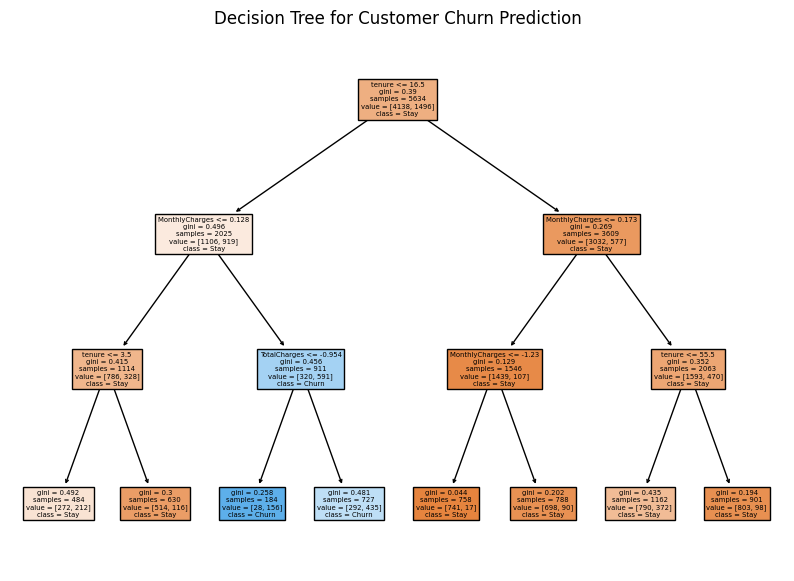

In [52]:
# Plot Decision Tree using Matplotlib
plt.figure(figsize=(10, 7))
plot_tree(model, feature_names=X.columns, class_names=["Stay", "Churn"], filled=True)
plt.title("Decision Tree for Churn Prediction")
plt.show()

In [55]:
df["Prediction"] = model.predict(X)
plot = px.scatter(df, x="tenure", y="TotalCharges", color="Prediction",
                 title="Customer Churn Prediction",
                 labels={"Prediction": "Predicted Churn (0=Stay,1=Churn)"},
                 color_continuous_scale="viridis")
plot.show()